In [1]:
import os
import shutil

# 원본 디렉토리 및 대상 디렉토리 설정
spiral_dir = '/root/staircase/spiral'
target_dir = '/root/staircase/images'

# 디렉토리가 존재하지 않으면 생성
os.makedirs(target_dir, exist_ok=True)

# spiral 디렉토리의 모든 jpg 파일 처리
for filename in os.listdir(spiral_dir):
    if filename.endswith('.jpg'):
        # 원본 파일 경로
        src_image_path = os.path.join(spiral_dir, filename)
        
        # 대상 파일 경로
        dest_image_path = os.path.join(target_dir, filename)
        
        # 이미지 파일 복사
        shutil.copy(src_image_path, dest_image_path)
        
        # 라벨 파일 생성
        label_filename = filename.replace('.jpg', '.txt')
        label_path = os.path.join(target_dir, label_filename)
        with open(label_path, 'w') as label_file:
            label_file.write('1\n')  # 라벨로 '1' 작성
        
        print(f"Copied: {filename} and created label: {label_filename}")

print("All images and labels processed successfully.")

Copied: 9. Innovative Spiral.jpg and created label: 9. Innovative Spiral.txt
Copied: 6. Innovative Spiral.jpg and created label: 6. Innovative Spiral.txt
Copied: 4. Innovative Spiral.jpg and created label: 4. Innovative Spiral.txt
Copied: 2. .jpg and created label: 2. .txt
Copied: 10. Woonhuis Rotterdam.jpg and created label: 10. Woonhuis Rotterdam.txt
Copied: 10. Innovative Spiral.jpg and created label: 10. Innovative Spiral.txt
Copied: 2. Innovative Spiral.jpg and created label: 2. Innovative Spiral.txt
Copied: 13. Innovative Spiral.jpg and created label: 13. Innovative Spiral.txt
Copied: 9. Contemporary House.jpg and created label: 9. Contemporary House.txt
Copied: 11. Innovative Spiral.jpg and created label: 11. Innovative Spiral.txt
Copied: 14. Innovative Spiral.jpg and created label: 14. Innovative Spiral.txt
Copied: 12. Innovative Spiral.jpg and created label: 12. Innovative Spiral.txt
Copied: 14. DESMONDO -.jpg and created label: 14. DESMONDO -.txt
Copied: 5. Appartement Amster

In [2]:
import os
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split

# 이미지 및 라벨 경로 설정
image_dir = '/root/staircase/images'
label_dir = '/root/staircase/images'  # 레이블 파일이 이미지와 동일한 경로에 있다고 하셨으므로 수정

# 이미지와 레이블을 저장할 리스트 초기화
image_paths = []
labels = []

# 이미지 디렉토리 내의 모든 파일에 대해 반복
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'):
        image_path = os.path.join(image_dir, filename)
        label_path = os.path.join(label_dir, filename.replace('.jpg', '.txt'))
        
        # 레이블 파일이 존재하는지 확인
        if os.path.exists(label_path):
            # 레이블 파일의 크기가 0인지 확인 (비어있는 파일)
            if os.path.getsize(label_path) == 0:
                print(f"{label_path} is empty. No objects detected.")
                label = 0  # 계단 없음
            else:
                with open(label_path, 'r') as f:
                    content = f.read()
                    # 클래스 번호 목록 초기화
                    class_numbers = []
                    
                    for line in content.strip().split('\n'):
                        line = line.strip()
                        if line:
                            tokens = line.split()
                            if len(tokens) > 0:
                                class_number = tokens[0]
                                class_numbers.append(class_number)
                    
                    # 클래스 '1'(계단)가 있는지 확인
                    if '1' in class_numbers:
                        print(f"Stair detected in {label_path}")
                        label = 1  # 계단 있음
                    else:
                        label = 0  # 계단 없음
        else:
            print(f"Label file not found for {filename}")
            label = 0  # 레이블 파일이 없으면 계단 없음으로 처리

        image_paths.append(image_path)
        labels.append(label)

# 데이터프레임 생성
df = pd.DataFrame({'image': image_paths, 'label': labels})

# 학습 및 검증 세트로 분할
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])


Stair detected in /root/staircase/images/IMG_20181029_151336_flipped.txt
Stair detected in /root/staircase/images/IMG_20181029_142141.txt
Stair detected in /root/staircase/images/IMG_20181004_173507_flipped.txt
/root/staircase/images/01a430b5379fe42c.txt is empty. No objects detected.
Stair detected in /root/staircase/images/2448579472_67f8dc5f87_flipped.txt
Stair detected in /root/staircase/images/IMG_20181029_151401.txt
Stair detected in /root/staircase/images/IMG_20181004_170526_flipped.txt
Stair detected in /root/staircase/images/IMG_20181029_153953_flipped.txt
Stair detected in /root/staircase/images/IMG_20181004_171737.txt
Stair detected in /root/staircase/images/IMG_20181029_142258_flipped.txt
Stair detected in /root/staircase/images/IMG_20181029_143228.txt
Stair detected in /root/staircase/images/IMG_20181004_165128_flipped.txt
Stair detected in /root/staircase/images/IMG_20181022_000421_flipped.txt
/root/staircase/images/00a60d051d75144f.txt is empty. No objects detected.
Stai

In [3]:
import torch
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader

# 데이터 변환 설정 (Normalize 추가)
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
}

class StaircaseDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image_path = self.df.loc[idx, 'image']
        label = self.df.loc[idx, 'label']
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

# 데이터셋 생성
train_dataset = StaircaseDataset(train_df, transform=data_transforms['train'])
val_dataset = StaircaseDataset(val_df, transform=data_transforms['val'])

# 데이터로더 생성
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)


In [4]:
import torch.nn as nn
import torch.optim as optim

# 사전 학습된 ResNet18 모델 로드
model = models.resnet18(pretrained=True)

# 출력 레이어 수정 (이진 분류)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)

# 손실 함수 및 옵티마이저 설정 (학습률 감소)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# 모델 학습 루프 (에폭 수 증가)
num_epochs = 25
model = model.to('cuda')

from sklearn.metrics import accuracy_score

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.to('cuda')
        labels = labels.to('cuda').float().unsqueeze(1)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        
    epoch_loss = running_loss / len(train_dataset)
    
    # 검증 정확도 계산
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_inputs = val_inputs.to('cuda')
            val_labels = val_labels.to('cuda').float().unsqueeze(1)
            outputs = model(val_inputs)
            preds = torch.sigmoid(outputs) > 0.5
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(val_labels.cpu().numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Validation Accuracy: {accuracy:.4f}')
    model.train()  # 다시 학습 모드로 전환


/root/anaconda3/envs/staircase/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/anaconda3/envs/staircase/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/25, Loss: 0.1084, Validation Accuracy: 0.9851
Epoch 2/25, Loss: 0.0428, Validation Accuracy: 0.9871
Epoch 3/25, Loss: 0.0228, Validation Accuracy: 0.9920
Epoch 4/25, Loss: 0.0106, Validation Accuracy: 0.9901
Epoch 5/25, Loss: 0.0055, Validation Accuracy: 0.9930
Epoch 6/25, Loss: 0.0030, Validation Accuracy: 0.9920
Epoch 7/25, Loss: 0.0033, Validation Accuracy: 0.9911
Epoch 8/25, Loss: 0.0023, Validation Accuracy: 0.9871
Epoch 9/25, Loss: 0.0028, Validation Accuracy: 0.9891
Epoch 10/25, Loss: 0.0044, Validation Accuracy: 0.9891
Epoch 11/25, Loss: 0.0128, Validation Accuracy: 0.9811
Epoch 12/25, Loss: 0.0169, Validation Accuracy: 0.9911
Epoch 13/25, Loss: 0.0069, Validation Accuracy: 0.9851
Epoch 14/25, Loss: 0.0066, Validation Accuracy: 0.9920
Epoch 15/25, Loss: 0.0032, Validation Accuracy: 0.9920
Epoch 16/25, Loss: 0.0031, Validation Accuracy: 0.9920
Epoch 17/25, Loss: 0.0021, Validation Accuracy: 0.9920
Epoch 18/25, Loss: 0.0026, Validation Accuracy: 0.9911
Epoch 19/25, Loss: 

In [5]:
# 최종 검증 정확도 계산
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to('cuda')
        labels = labels.to('cuda').float().unsqueeze(1)
        outputs = model(inputs)
        preds = torch.sigmoid(outputs) > 0.5
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
accuracy = accuracy_score(all_labels, all_preds)
print(f'Final Validation Accuracy: {accuracy:.4f}')

Final Validation Accuracy: 0.9920


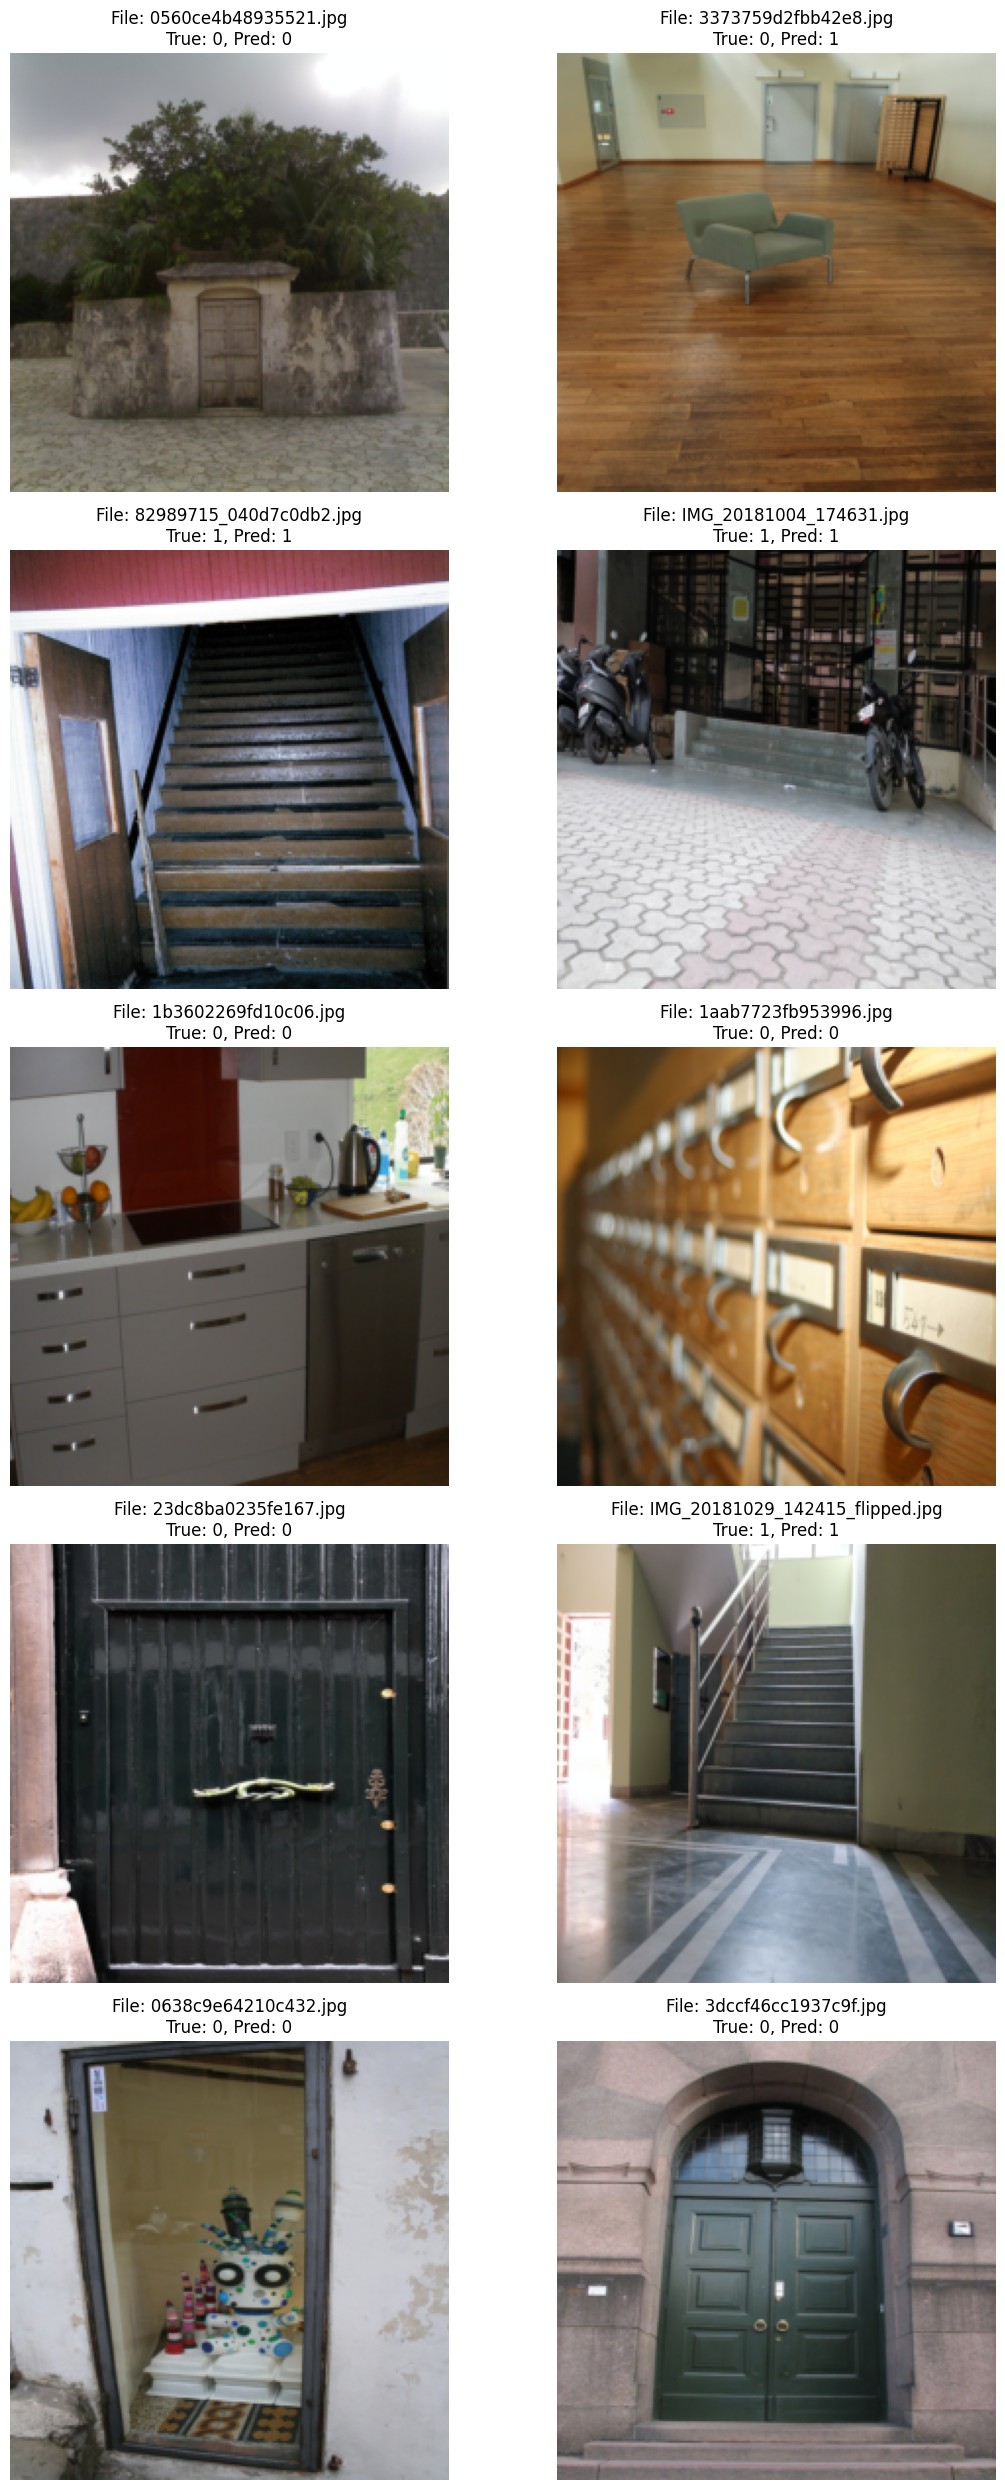

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os

# 모델을 평가 모드로 전환
model.eval()

# 검증 데이터셋에서 랜덤하게 10장의 이미지 선택
example_indices = np.random.choice(len(val_dataset), size=10, replace=False)

# 이미지와 레이블을 저장할 리스트 초기화
images = []
true_labels = []
predicted_labels = []
file_names = []

# 예시 이미지에 대해 예측 수행
with torch.no_grad():
    for idx in example_indices:
        image, label = val_dataset[idx]
        inputs = image.unsqueeze(0).to('cuda')  # 'cuda' 대신 'device' 사용
        outputs = model(inputs)
        preds = torch.sigmoid(outputs) > 0.5
        predicted_label = preds.item()
        
        images.append(image.cpu())
        true_labels.append(label)
        predicted_labels.append(int(predicted_label))
        
        # 파일 이름 가져오기
        file_path = val_df.iloc[idx]['image']
        file_name = os.path.basename(file_path)
        file_names.append(file_name)

# 이미지 표시 함수 수정
def imshow(inp, title=None, ax=None):
    """Tensor 이미지를 보여주는 함수"""
    if ax is None:
        ax = plt.gca()
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])  # ImageNet 평균값
    std = np.array([0.229, 0.224, 0.225])   # ImageNet 표준편차
    inp = std * inp + mean  # 역정규화 수행
    inp = np.clip(inp, 0, 1)
    ax.imshow(inp)
    if title:
        ax.set_title(title)
    ax.axis('off')

# 서브플롯 생성 및 이미지 출력 (2열 5행 배열)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 25))

axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx < len(images):
        imshow(
            images[idx],
            title=f'File: {file_names[idx]}\nTrue: {true_labels[idx]}, Pred: {predicted_labels[idx]}',
            ax=ax
        )
    else:
        ax.axis('off')  # 남은 서브플롯 비활성화

plt.tight_layout()
plt.show()


In [7]:
import os

# 모델 저장 경로 설정
model_dir = '/root/staircase/models'
os.makedirs(model_dir, exist_ok=True)

# 모델 저장 경로 설정
model_save_path = os.path.join(model_dir, 'resnet18_staircase.pth')

# 모델 저장
torch.save(model.state_dict(), model_save_path)
print(f'Model saved to {model_save_path}')

Model saved to /root/staircase/models/resnet18_staircase.pth


/root/anaconda3/envs/staircase/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/anaconda3/envs/staircase/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/tmp/ipykernel_7028/521288894.py:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be fl

Model loaded successfully.


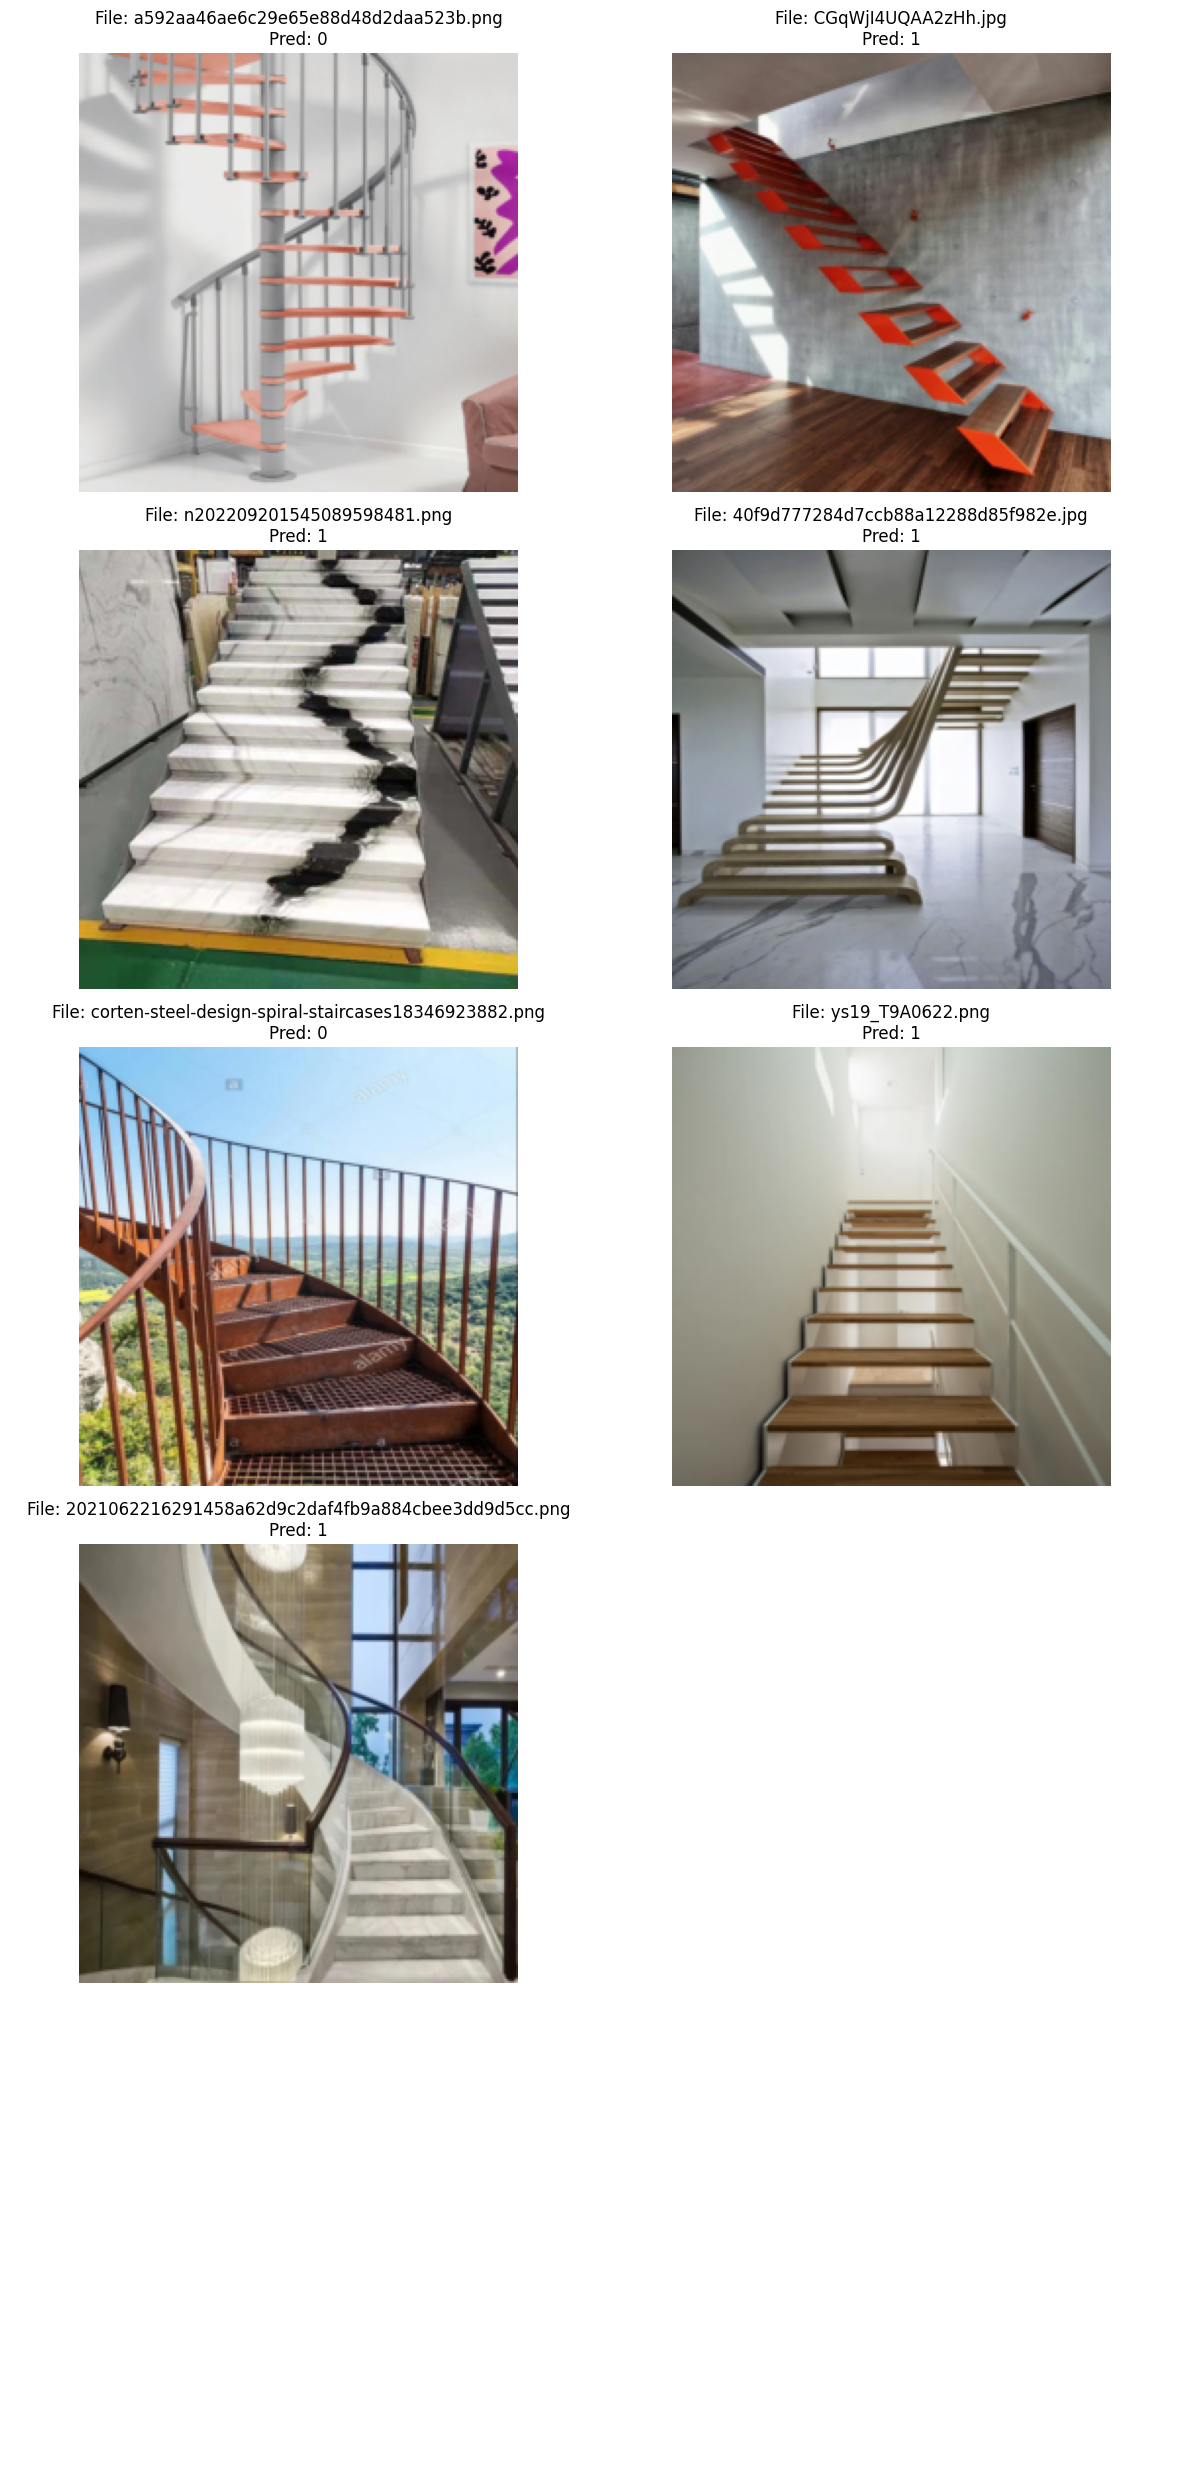

In [8]:
# 필요한 라이브러리 임포트
import os
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def imshow(inp, title=None, ax=None):
    """Tensor 이미지를 보여주는 함수"""
    if ax is None:
        ax = plt.gca()
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])  # ImageNet 평균값
    std = np.array([0.229, 0.224, 0.225])   # ImageNet 표준편차
    inp = std * inp + mean  # 역정규화 수행
    inp = np.clip(inp, 0, 1)
    ax.imshow(inp)
    if title:
        ax.set_title(title)
    ax.axis('off')

# 테스트 데이터 디렉토리 설정
test_image_dir = '/root/staircase/test'

# 모델 저장 경로 설정
model_dir = '/root/staircase/models'
model_save_path = os.path.join(model_dir, 'resnet18_staircase.pth')

# 모델 불러오기
model = models.resnet18(pretrained=False)  # 이미 저장된 가중치를 불러오므로 pretrained=False
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 1)
model = model.to('cuda')

model.load_state_dict(torch.load(model_save_path))
model.eval()
print("Model loaded successfully.")

# 테스트 이미지 로드
test_images = []
test_image_names = []

# 지원 파일 확장자
supported_extensions = ('.jpg', '.png')

for filename in os.listdir(test_image_dir):
    if filename.endswith(supported_extensions):
        test_image_path = os.path.join(test_image_dir, filename)
        test_images.append(test_image_path)
        test_image_names.append(filename)

# 테스트 이미지 변환 설정 (Normalize 추가)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

# 테스트 이미지 예측 및 결과 저장
predicted_labels = []

with torch.no_grad():
    for image_path in test_images:
        image = Image.open(image_path).convert('RGB')
        transformed_image = test_transform(image).unsqueeze(0).to('cuda')
        output = model(transformed_image)
        pred_label = (torch.sigmoid(output) > 0.5).item()
        predicted_labels.append(int(pred_label))

# 이미지 시각화
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 25))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx < len(test_images):
        # 원본 이미지 읽기
        image = Image.open(test_images[idx]).convert('RGB')
        transformed_image = test_transform(image)

        # 이미지 표시
        imshow(
            transformed_image.cpu(),
            title=f'File: {test_image_names[idx]}\nPred: {predicted_labels[idx]}',
            ax=ax
        )
    else:
        ax.axis('off')  # 남은 서브플롯 비활성화

plt.tight_layout()
plt.show()


In [19]:
import os
import torch
from torchvision import models, transforms
from PIL import Image
import cv2  # OpenCV 라이브러리
import numpy as np

# 모델 저장 경로 설정
model_dir = '/root/staircase/models'
model_save_path = os.path.join(model_dir, 'resnet18_staircase.pth')

# 모델 불러오기
model = models.resnet18(pretrained=False)  # 이미 저장된 가중치를 불러오므로 pretrained=False
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 1)
model = model.to('cuda')

model.load_state_dict(torch.load(model_save_path))
model.eval()
print("Model loaded successfully.")


Model loaded successfully.


/tmp/ipykernel_1598/2326388676.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_save_path))


In [20]:
# 테스트 이미지 변환 설정 (Normalize 추가)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])


/tmp/ipykernel_1598/1332747718.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_save_path))


Model loaded successfully.
Processing video: /root/staircase/videos/KakaoTalk_20241123_173940226.mp4
Video FPS: 29.96353322528363, Total Frames: 493, Duration: 16.453333333333333 seconds
Frame 0: No stairs detected


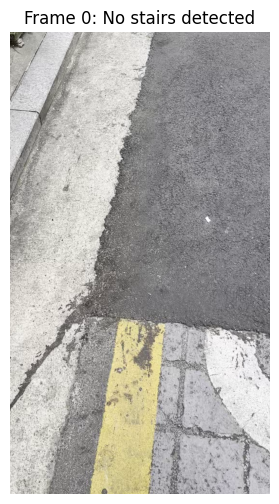

Frame 1: No stairs detected


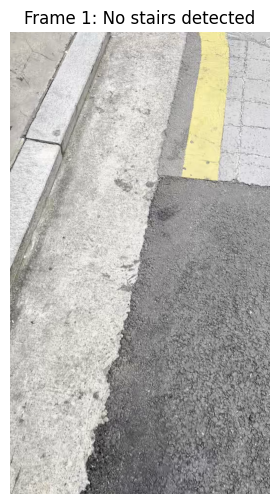

Frame 2: No stairs detected


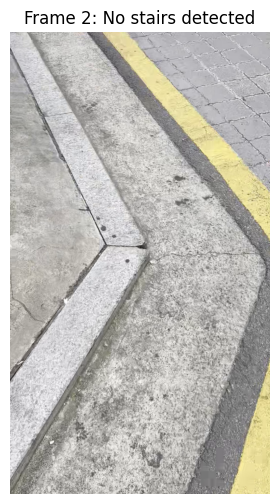

Frame 3: Stairs detected


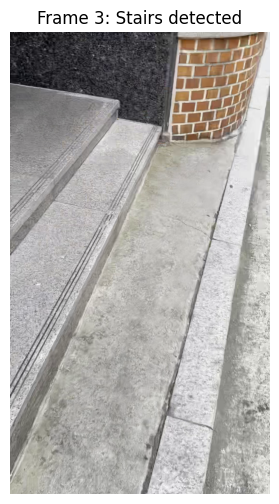

Frame 4: Stairs detected


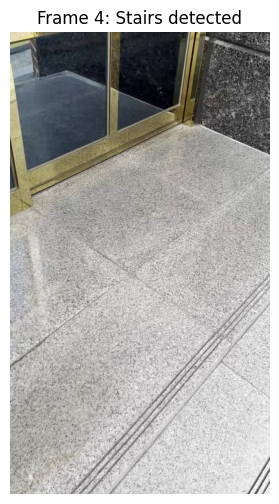

Frame 5: Stairs detected


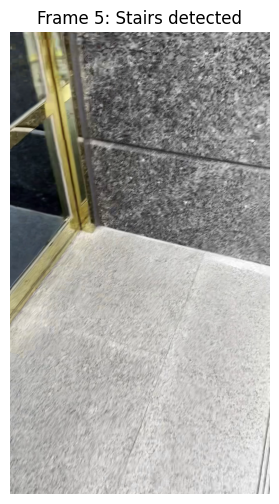

Frame 6: No stairs detected


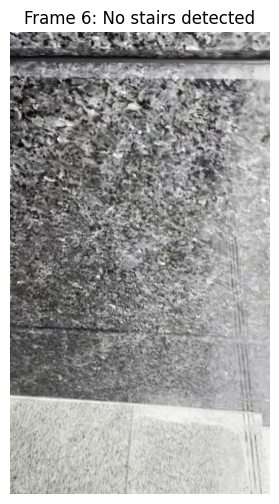

Frame 7: No stairs detected


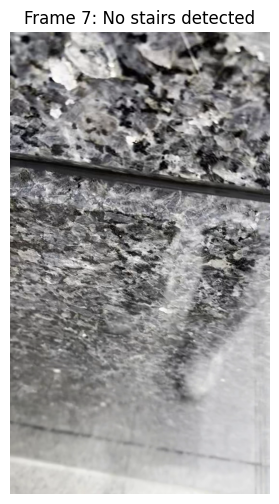

Frame 8: No stairs detected


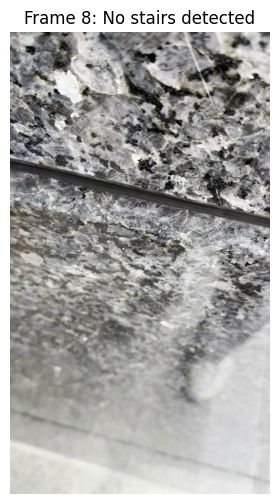

Frame 9: No stairs detected


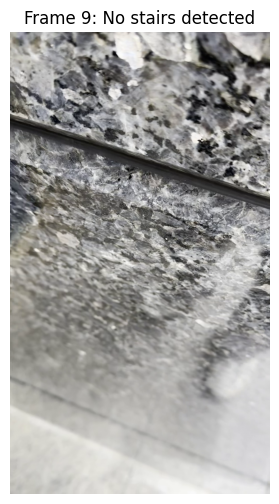

Frame 10: Stairs detected


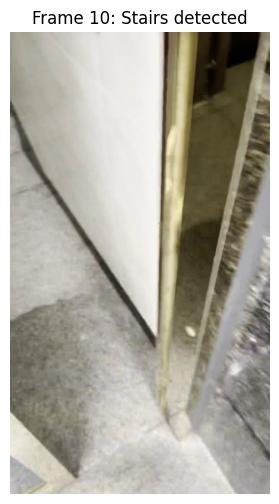

Frame 11: Stairs detected


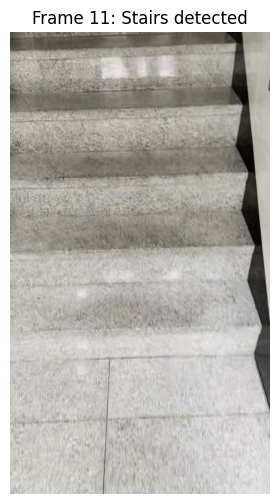

Frame 12: Stairs detected


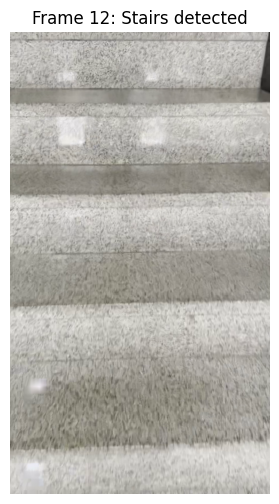

Frame 13: Stairs detected


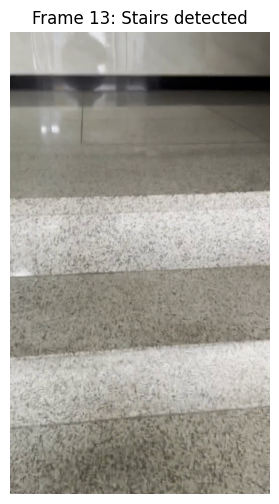

Frame 14: Stairs detected


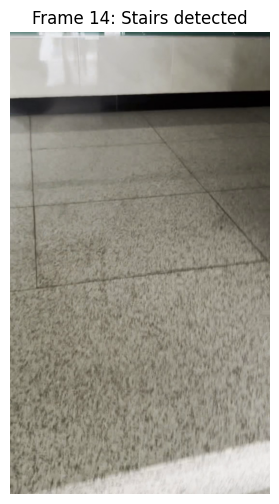

Frame 15: Stairs detected


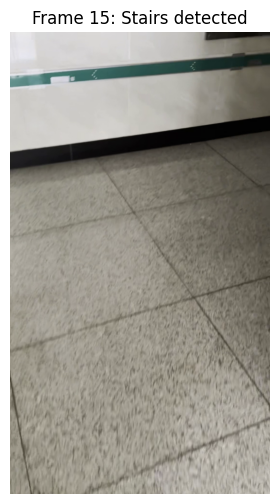

Frame 16: Stairs detected


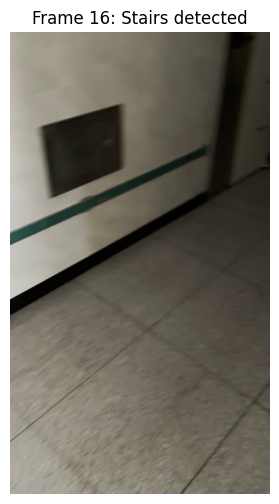

In [22]:
# 필요한 라이브러리 임포트
import os
import torch
from torchvision import models, transforms
from PIL import Image
import cv2  # OpenCV 라이브러리
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output  # 주피터 노트북에서 출력 제어를 위한 라이브러리

# 모델 저장 경로 설정
model_dir = '/root/staircase/models'
model_save_path = os.path.join(model_dir, 'resnet18_staircase.pth')

# 모델 불러오기
model = models.resnet18(pretrained=False)  # 이미 저장된 가중치를 불러오므로 pretrained=False
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 1)
model = model.to('cuda')

model.load_state_dict(torch.load(model_save_path))
model.eval()
print("Model loaded successfully.")

# 테스트 이미지 변환 설정 (Normalize 추가)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

# 비디오 파일 경로 설정
video_dir = '/root/staircase/videos'
video_files = [f for f in os.listdir(video_dir) if f.endswith('.mp4')]

# 비디오 파일이 있는지 확인
if not video_files:
    print("No video files found in the specified directory.")
else:
    video_path = os.path.join(video_dir, video_files[0])  # 첫 번째 비디오 파일 선택
    print(f"Processing video: {video_path}")

    # 비디오 캡처 객체 생성
    cap = cv2.VideoCapture(video_path)

    # 비디오의 FPS와 총 프레임 수 가져오기
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = total_frames / fps
    print(f"Video FPS: {fps}, Total Frames: {total_frames}, Duration: {duration} seconds")

    # 1초마다 프레임을 추출하기 위한 프레임 간격 계산
    frame_interval = int(fps)  # FPS가 소수일 경우를 대비하여 int로 변환

    current_frame = 0
    frame_number = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if current_frame % frame_interval == 0:
            # OpenCV 이미지를 PIL 이미지로 변환
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            pil_image = Image.fromarray(image)

            # 이미지 변환 적용
            transformed_image = test_transform(pil_image).unsqueeze(0).to('cuda')

            # 모델 예측
            with torch.no_grad():
                output = model(transformed_image)
                pred_label = (torch.sigmoid(output) > 0.5).item()

            # 결과 출력
            label_text = 'Stairs detected' if pred_label == 1 else 'No stairs detected'
            print(f"Frame {frame_number}: {label_text}")

            # 이미지 표시
            plt.figure(figsize=(8, 6))
            plt.imshow(image)
            plt.title(f"Frame {frame_number}: {label_text}")
            plt.axis('off')
            plt.show()

            # 주피터 노트북에서 이전 출력 지우기 (옵션)
            # clear_output(wait=True)
            # display(plt.gcf())

            frame_number += 1

        current_frame += 1

    cap.release()
    cv2.destroyAllWindows()
